# Big-Mart Sales Prediction 



BigMart's data scientists have gathered 2013 sales information for 1559 products from 10 stores located in various cities. Also defined are the characteristics of each product and retailer. This data science project aims to create a predictive model and determine each product's sales at a certain store.
With the help of this model, BigMart will attempt to comprehend the characteristics of the goods and the shops that are essential to boosting sales.


firstly we will import the necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import *
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

## loading the data files

In [2]:
train_data=pd.read_excel("F:\\technocolab\Train.xlsx")
test_data=pd.read_excel("F:\\technocolab\Test.xlsx")
train_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Item_Identifier: It represents the unique identifier for each item in the dataset.

Item_Weight: It denotes the weight of the item.

Item_Fat_Content: It indicates the fat content of the item, categorized as "Low Fat" or "Regular".

Item_Visibility: It signifies the percentage of total display area of the item in the store.

Item_Type: It represents the category or type of the item, such as "Dairy", "Soft Drinks", "Meat", etc.

Item_MRP: It denotes the maximum retail price (MRP) of the item.

Outlet_Identifier: It represents the unique identifier for each outlet/store.

Outlet_Establishment_Year: It indicates the year in which the outlet/store was established.

Outlet_Size: It represents the size of the outlet, categorized as "Small", "Medium", or "High".

Outlet_Location_Type: It signifies the location type of the outlet, categorized as "Tier 1", "Tier 2", or "Tier 3".

Outlet_Type: It represents the type of outlet/store, such as "Supermarket Type1", "Supermarket Type2", or "Grocery Store".

Item_Outlet_Sales: It denotes the sales of the item in the respective outlet.

# Exploratory Data Analysis

In [4]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## preprocessing train and test data

In [9]:
train_data['Item_Weight']=train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean)
train_data['Item_Weight']=pd.to_numeric(train_data['Item_Weight'],errors='coerce').fillna(train_data['Item_Weight'].mean)
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode)

In [10]:
train_data=train_data.replace({'Item_Fat_Content':{'Low Fat':1,'LF':1,'low fat':1,'reg':2,"Regular":2}})
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,1,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,<bound method Series.mode of 0 Medium\n1...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.38,2,0.046982,Baking Goods,108.1570,OUT045,2002,<bound method Series.mode of 0 Medium\n1...,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.6,1,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,2,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [11]:
test_data['Item_Weight']=pd.to_numeric(test_data['Item_Weight'],errors='coerce').fillna(test_data['Item_Weight'].mean)
test_data['Outlet_Size']=test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode)
test_data=test_data.replace({'Item_Fat_Content':{'Low Fat':1,'LF':1,'low fat':1,'reg':2,"Regular":2}})
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,1,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.3,2,0.038428,Dairy,87.3198,OUT017,2007,<bound method Series.mode of 0 Medium\n1...,Tier 2,Supermarket Type1
2,NCN55,14.6,1,0.099575,Others,241.7538,OUT010,1998,<bound method Series.mode of 0 Medium\n1...,Tier 3,Grocery Store
3,FDQ58,7.315,1,0.015388,Snack Foods,155.0340,OUT017,2007,<bound method Series.mode of 0 Medium\n1...,Tier 2,Supermarket Type1
4,FDY38,<bound method NDFrame._add_numeric_operations....,2,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.5,2,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,2,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,1,0.073529,Health and Hygiene,118.7440,OUT045,2002,<bound method Series.mode of 0 Medium\n1...,Tier 2,Supermarket Type1
5679,FDJ26,15.3,2,0.000000,Canned,214.6218,OUT017,2007,<bound method Series.mode of 0 Medium\n1...,Tier 2,Supermarket Type1


In [12]:
print(train_data.corr())

                           Item_Fat_Content  Item_Visibility  Item_MRP  \
Item_Fat_Content                   1.000000         0.047314  0.006063   
Item_Visibility                    0.047314         1.000000 -0.001315   
Item_MRP                           0.006063        -0.001315  1.000000   
Outlet_Establishment_Year          0.003151        -0.074834  0.005020   
Item_Outlet_Sales                  0.018719        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Fat_Content                            0.003151           0.018719  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000  


<AxesSubplot:>

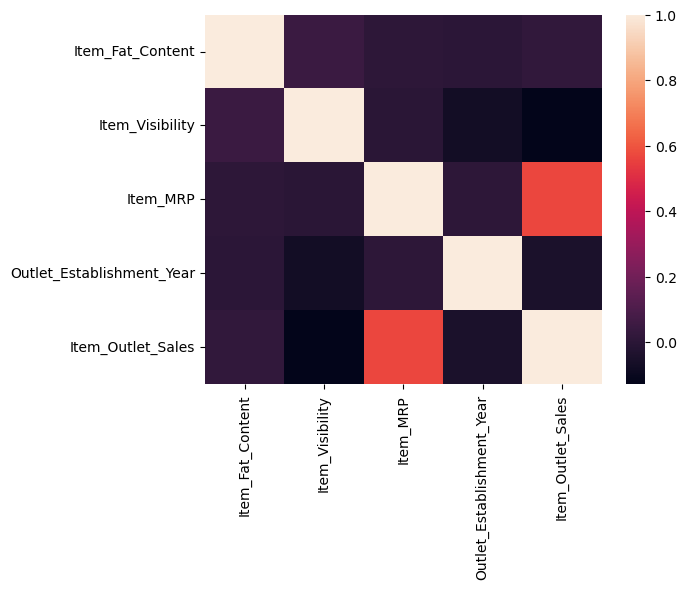

In [13]:
sns.heatmap(train_data.corr())

In [14]:
train_data=train_data.drop(['Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Identifier'],axis=1)
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales
0,9.3,1,0.016047,Dairy,249.8092,OUT049,3735.1380
1,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,443.4228
2,17.5,1,0.016760,Meat,141.6180,OUT049,2097.2700
3,19.2,2,0.000000,Fruits and Vegetables,182.0950,OUT010,732.3800
4,8.93,1,0.000000,Household,53.8614,OUT013,994.7052
...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,Snack Foods,214.5218,OUT013,2778.3834
8519,8.38,2,0.046982,Baking Goods,108.1570,OUT045,549.2850
8520,10.6,1,0.035186,Health and Hygiene,85.1224,OUT035,1193.1136
8521,7.21,2,0.145221,Snack Foods,103.1332,OUT018,1845.5976


In [15]:
test_data=test_data.drop(['Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Identifier'],axis=1)
test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier
0,20.75,1,0.007565,Snack Foods,107.8622,OUT049
1,8.3,2,0.038428,Dairy,87.3198,OUT017
2,14.6,1,0.099575,Others,241.7538,OUT010
3,7.315,1,0.015388,Snack Foods,155.0340,OUT017
4,<bound method NDFrame._add_numeric_operations....,2,0.118599,Dairy,234.2300,OUT027
...,...,...,...,...,...,...
5676,10.5,2,0.013496,Snack Foods,141.3154,OUT046
5677,7.6,2,0.142991,Starchy Foods,169.1448,OUT018
5678,10.0,1,0.073529,Health and Hygiene,118.7440,OUT045
5679,15.3,2,0.000000,Canned,214.6218,OUT017


In [16]:
label_encoder = LabelEncoder()
categorical_cols = ['Item_Fat_Content', 'Outlet_Identifier']
for col in categorical_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])

In [17]:
train_data=pd.get_dummies(train_data,columns=['Item_Type'])
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.3,0,0.016047,249.8092,9,3735.1380,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,3,443.4228,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.5,0,0.016760,141.6180,9,2097.2700,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.2,1,0.000000,182.0950,0,732.3800,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,1,994.7052,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1,2778.3834,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.38,1,0.046982,108.1570,7,549.2850,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8520,10.6,0,0.035186,85.1224,6,1193.1136,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8521,7.21,1,0.145221,103.1332,3,1845.5976,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
label_encoder = LabelEncoder()
categorical_cols = ['Item_Fat_Content', 'Outlet_Identifier']
for col in categorical_cols:
    test_data[col] = label_encoder.fit_transform(test_data[col])
test_data=pd.get_dummies(test_data,columns=['Item_Type'])
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   object 
 1   Item_Fat_Content                 5681 non-null   int64  
 2   Item_Visibility                  5681 non-null   float64
 3   Item_MRP                         5681 non-null   float64
 4   Outlet_Identifier                5681 non-null   int32  
 5   Item_Type_Baking Goods           5681 non-null   uint8  
 6   Item_Type_Breads                 5681 non-null   uint8  
 7   Item_Type_Breakfast              5681 non-null   uint8  
 8   Item_Type_Canned                 5681 non-null   uint8  
 9   Item_Type_Dairy                  5681 non-null   uint8  
 10  Item_Type_Frozen Foods           5681 non-null   uint8  
 11  Item_Type_Fruits and Vegetables  5681 non-null   uint8  
 12  Item_Type_Hard Drink

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   object 
 1   Item_Fat_Content                 8523 non-null   int64  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Identifier                8523 non-null   int32  
 5   Item_Outlet_Sales                8523 non-null   float64
 6   Item_Type_Baking Goods           8523 non-null   uint8  
 7   Item_Type_Breads                 8523 non-null   uint8  
 8   Item_Type_Breakfast              8523 non-null   uint8  
 9   Item_Type_Canned                 8523 non-null   uint8  
 10  Item_Type_Dairy                  8523 non-null   uint8  
 11  Item_Type_Frozen Foods           8523 non-null   uint8  
 12  Item_Type_Fruits and

In [20]:
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.3,0,0.016047,249.8092,9,3735.1380,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,3,443.4228,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.5,0,0.016760,141.6180,9,2097.2700,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.2,1,0.000000,182.0950,0,732.3800,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,1,994.7052,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1,2778.3834,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.38,1,0.046982,108.1570,7,549.2850,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8520,10.6,0,0.035186,85.1224,6,1193.1136,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8521,7.21,1,0.145221,103.1332,3,1845.5976,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   object 
 1   Item_Fat_Content                 5681 non-null   int64  
 2   Item_Visibility                  5681 non-null   float64
 3   Item_MRP                         5681 non-null   float64
 4   Outlet_Identifier                5681 non-null   int32  
 5   Item_Type_Baking Goods           5681 non-null   uint8  
 6   Item_Type_Breads                 5681 non-null   uint8  
 7   Item_Type_Breakfast              5681 non-null   uint8  
 8   Item_Type_Canned                 5681 non-null   uint8  
 9   Item_Type_Dairy                  5681 non-null   uint8  
 10  Item_Type_Frozen Foods           5681 non-null   uint8  
 11  Item_Type_Fruits and Vegetables  5681 non-null   uint8  
 12  Item_Type_Hard Drink

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: float() argument must be a string or a number, not 'method'

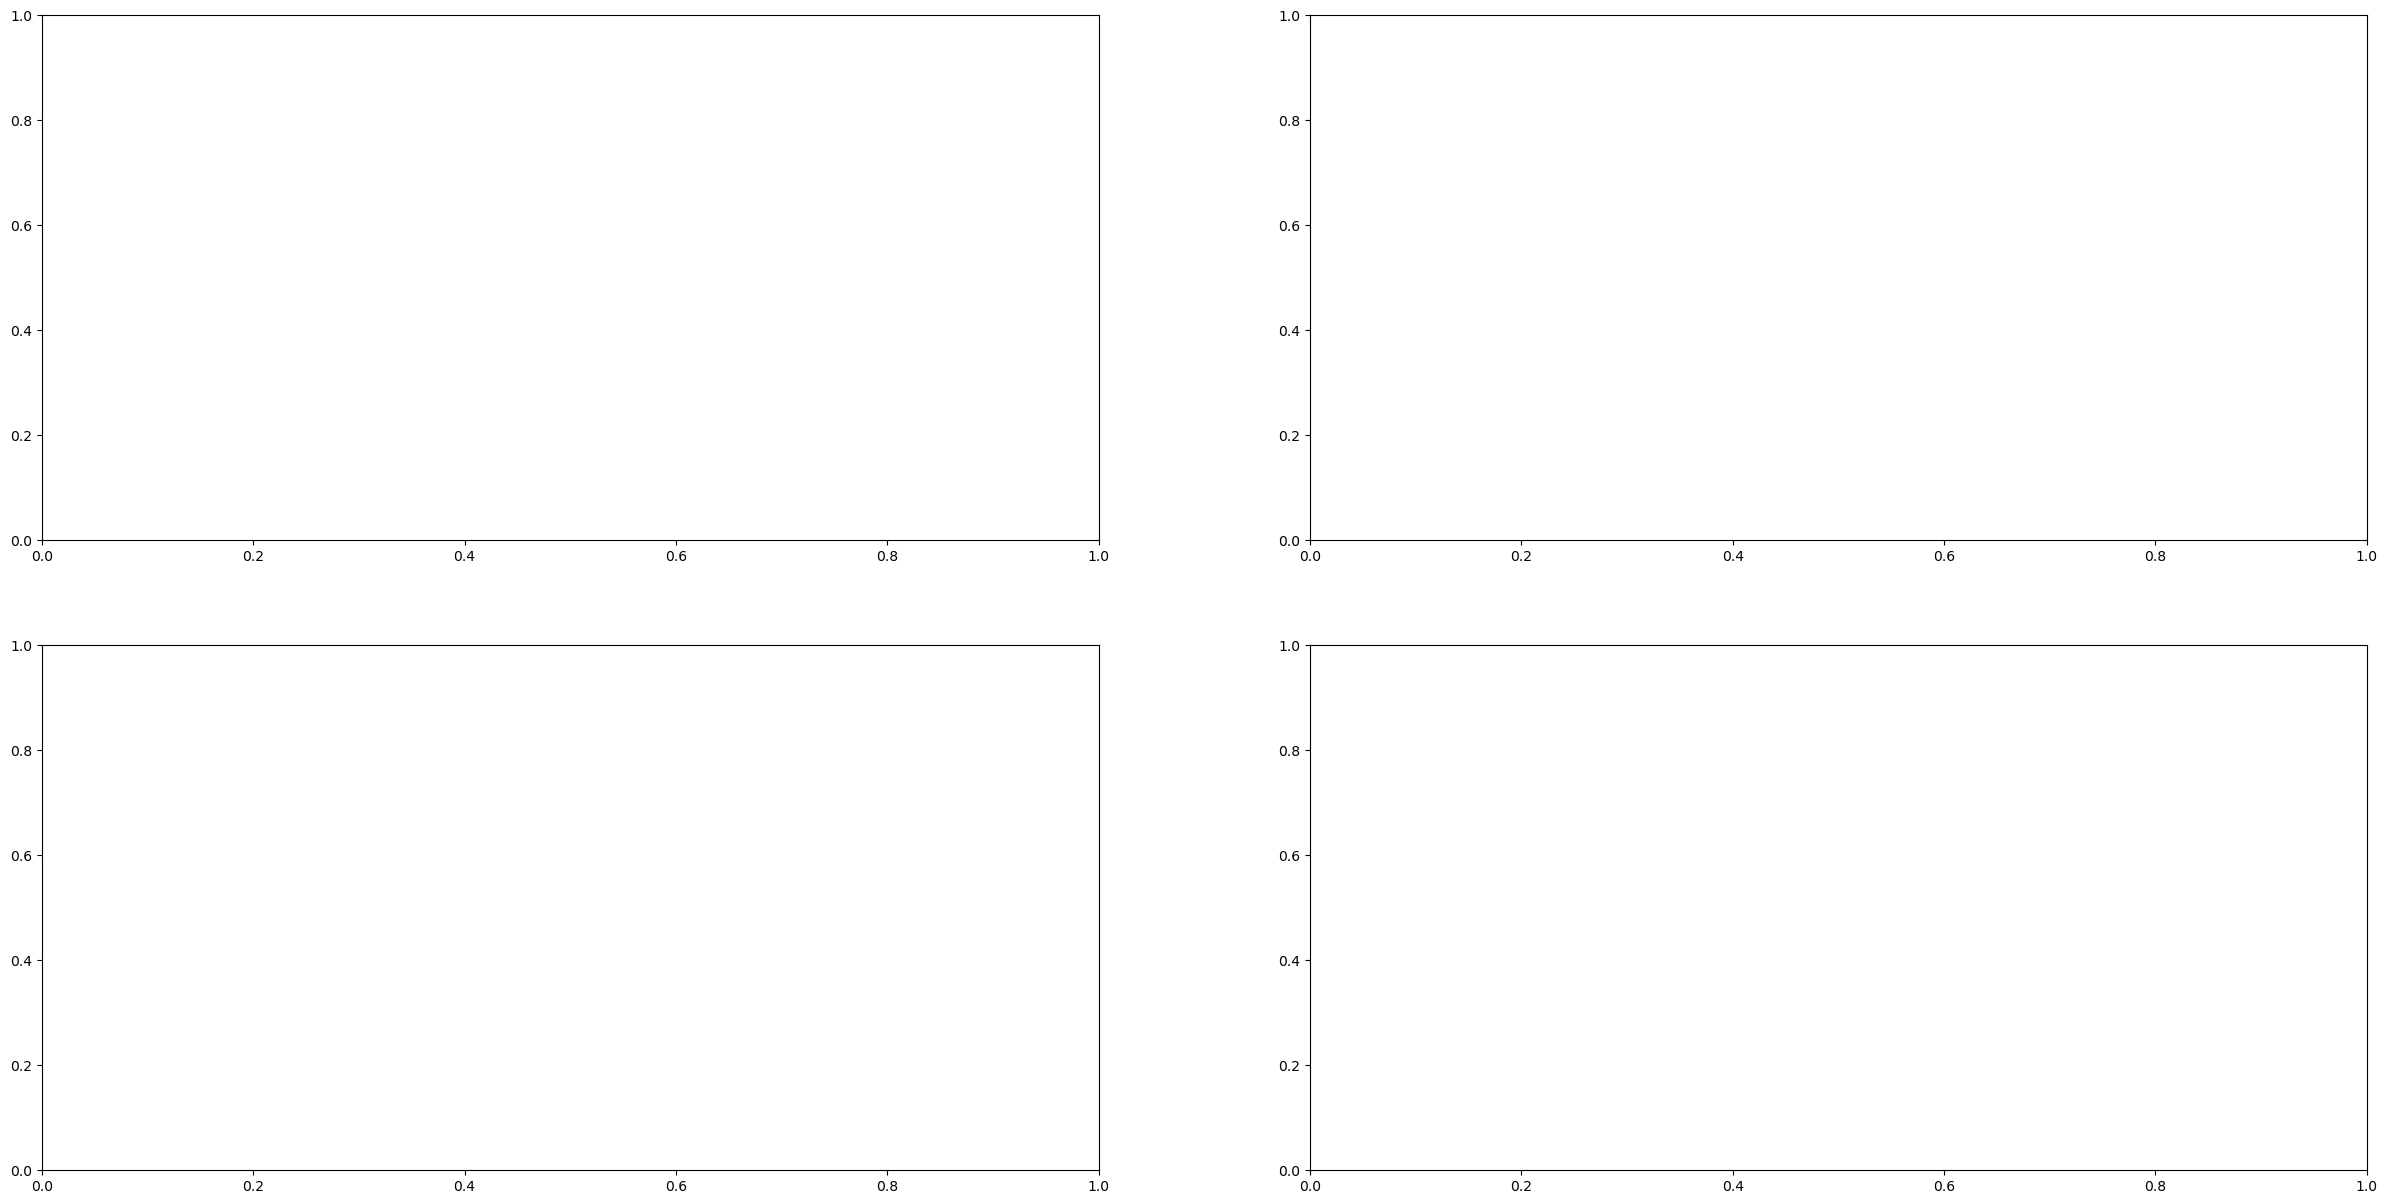

In [22]:
num_f=list(train_data.columns)
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
axes_font = {"family" : "arial", "color" : "darkgreen", "weight" : "bold", "size" : 12}
figure, axis = plt.subplots(2, 2, figsize = (30, 15))
i = 0
j = 0
for field in num_f:    
    sns.distplot(train_data[field], kde = True, bins = "auto", color = "gray", hist_kws = dict(linewidth = 1, edgecolor = "k"), ax = axis[i, j])
    axis[i, j].axvline(train_data[field].mean(), color = "r", ls = "--", lw = 2)               
    axis[i, j].set_title(field, fontdict = title_font)
    axis[i, j].set_xlabel(field, fontdict = axes_font)
    axis[i, j].set_ylabel("Density", fontdict = axes_font)
    axis[i, j].annotate(f"Statistics = {round(shapiro(train_data[field])[0], 4)}\nP-Value = {round(shapiro(train_data[field])[1], 4)}",
               xy = (0.8, 0.8), xycoords = "axes fraction", fontsize = 10, horizontalalignment = "left", verticalalignment = "bottom")    
    if ((j + 1) % 2) != 0:
        j += 1   
    else:
        j = 0
        i += 1 
plt.show()

In [23]:
#boxplot for outlier detection


Boxplot: Boxplot is a graphical representation that provides a visual summary of the distribution of a dataset, highlighting the median, quartiles, and potential outliers. It helps in detecting outliers and understanding the spread and skewness of the data.

TypeError: Horizontal orientation requires numeric `x` variable.

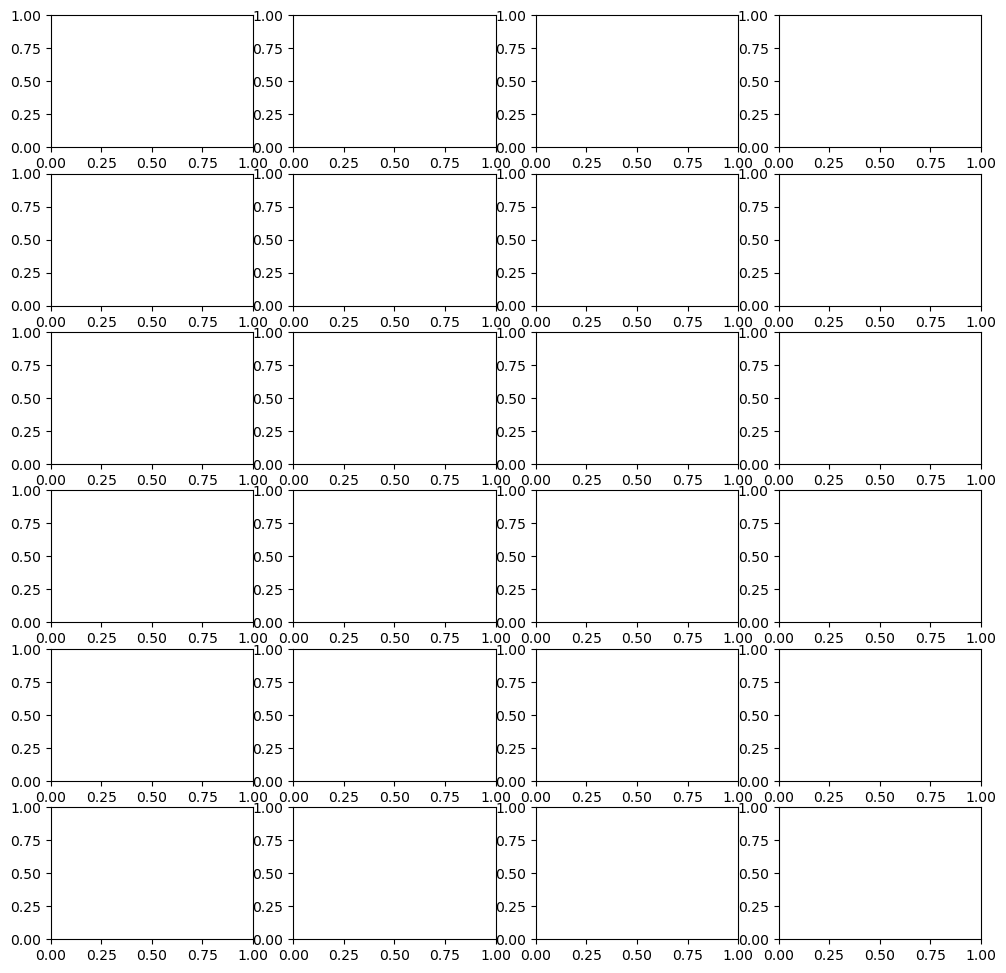

In [24]:
num_columns = len(train_data.columns)
num_rows = 6  # Number of rows for subplots
num_cols = num_columns // num_rows + 1  # Number of columns for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 12))
# Flatten the axes array
axes = axes.flatten()
for i, column in enumerate(train_data.columns):
    sns.boxplot(x=train_data[column], ax=axes[i])
    axes[i].set_title('Box Plot of {}'.format(column))
    axes[i].set_ylabel('Values')

# Hide empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

there are so many outliers for our target variable item outlet sales but could not see outliers for other

scatterplot of every column to locate the points of all observation

Scatterplot is a graph that displays the relationship between two numerical variables, showing how one variable changes with respect to the other. It helps in identifying patterns, trends, and potential correlations between variables in the dataset.

TypeError: float() argument must be a string or a number, not 'method'

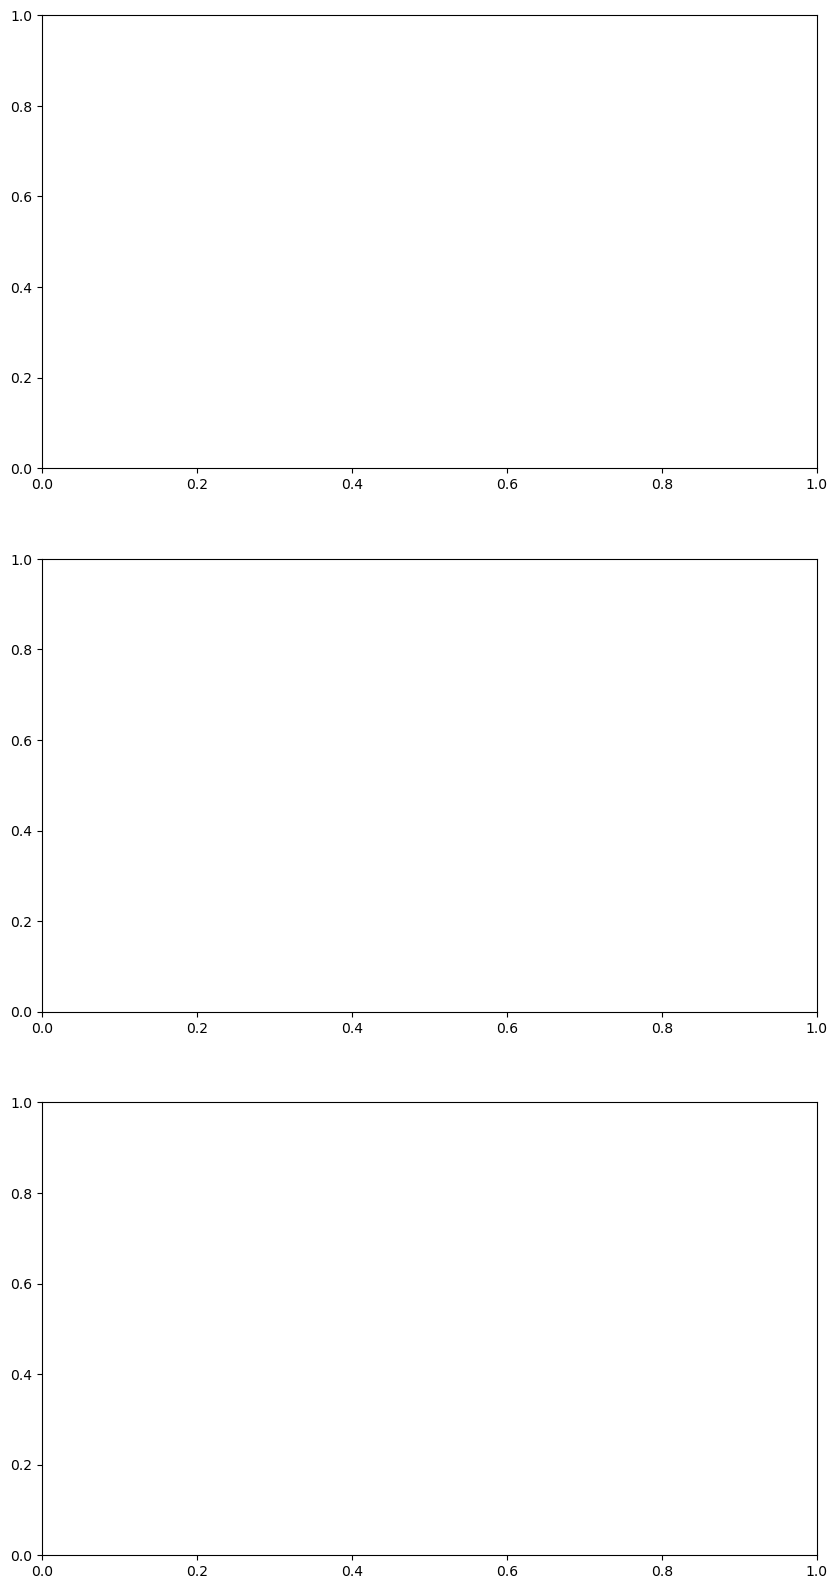

In [25]:
num_columns = len(train_data.columns)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,20))

for i, column in enumerate(train_data.columns):
    axes[i].scatter(range(len(train_data)), train_data[column])
    axes[i].set_title('Scatter Plot of {}'.format(column))
    axes[i].set_ylabel(column)
plt.show()

In [26]:
#pairplot

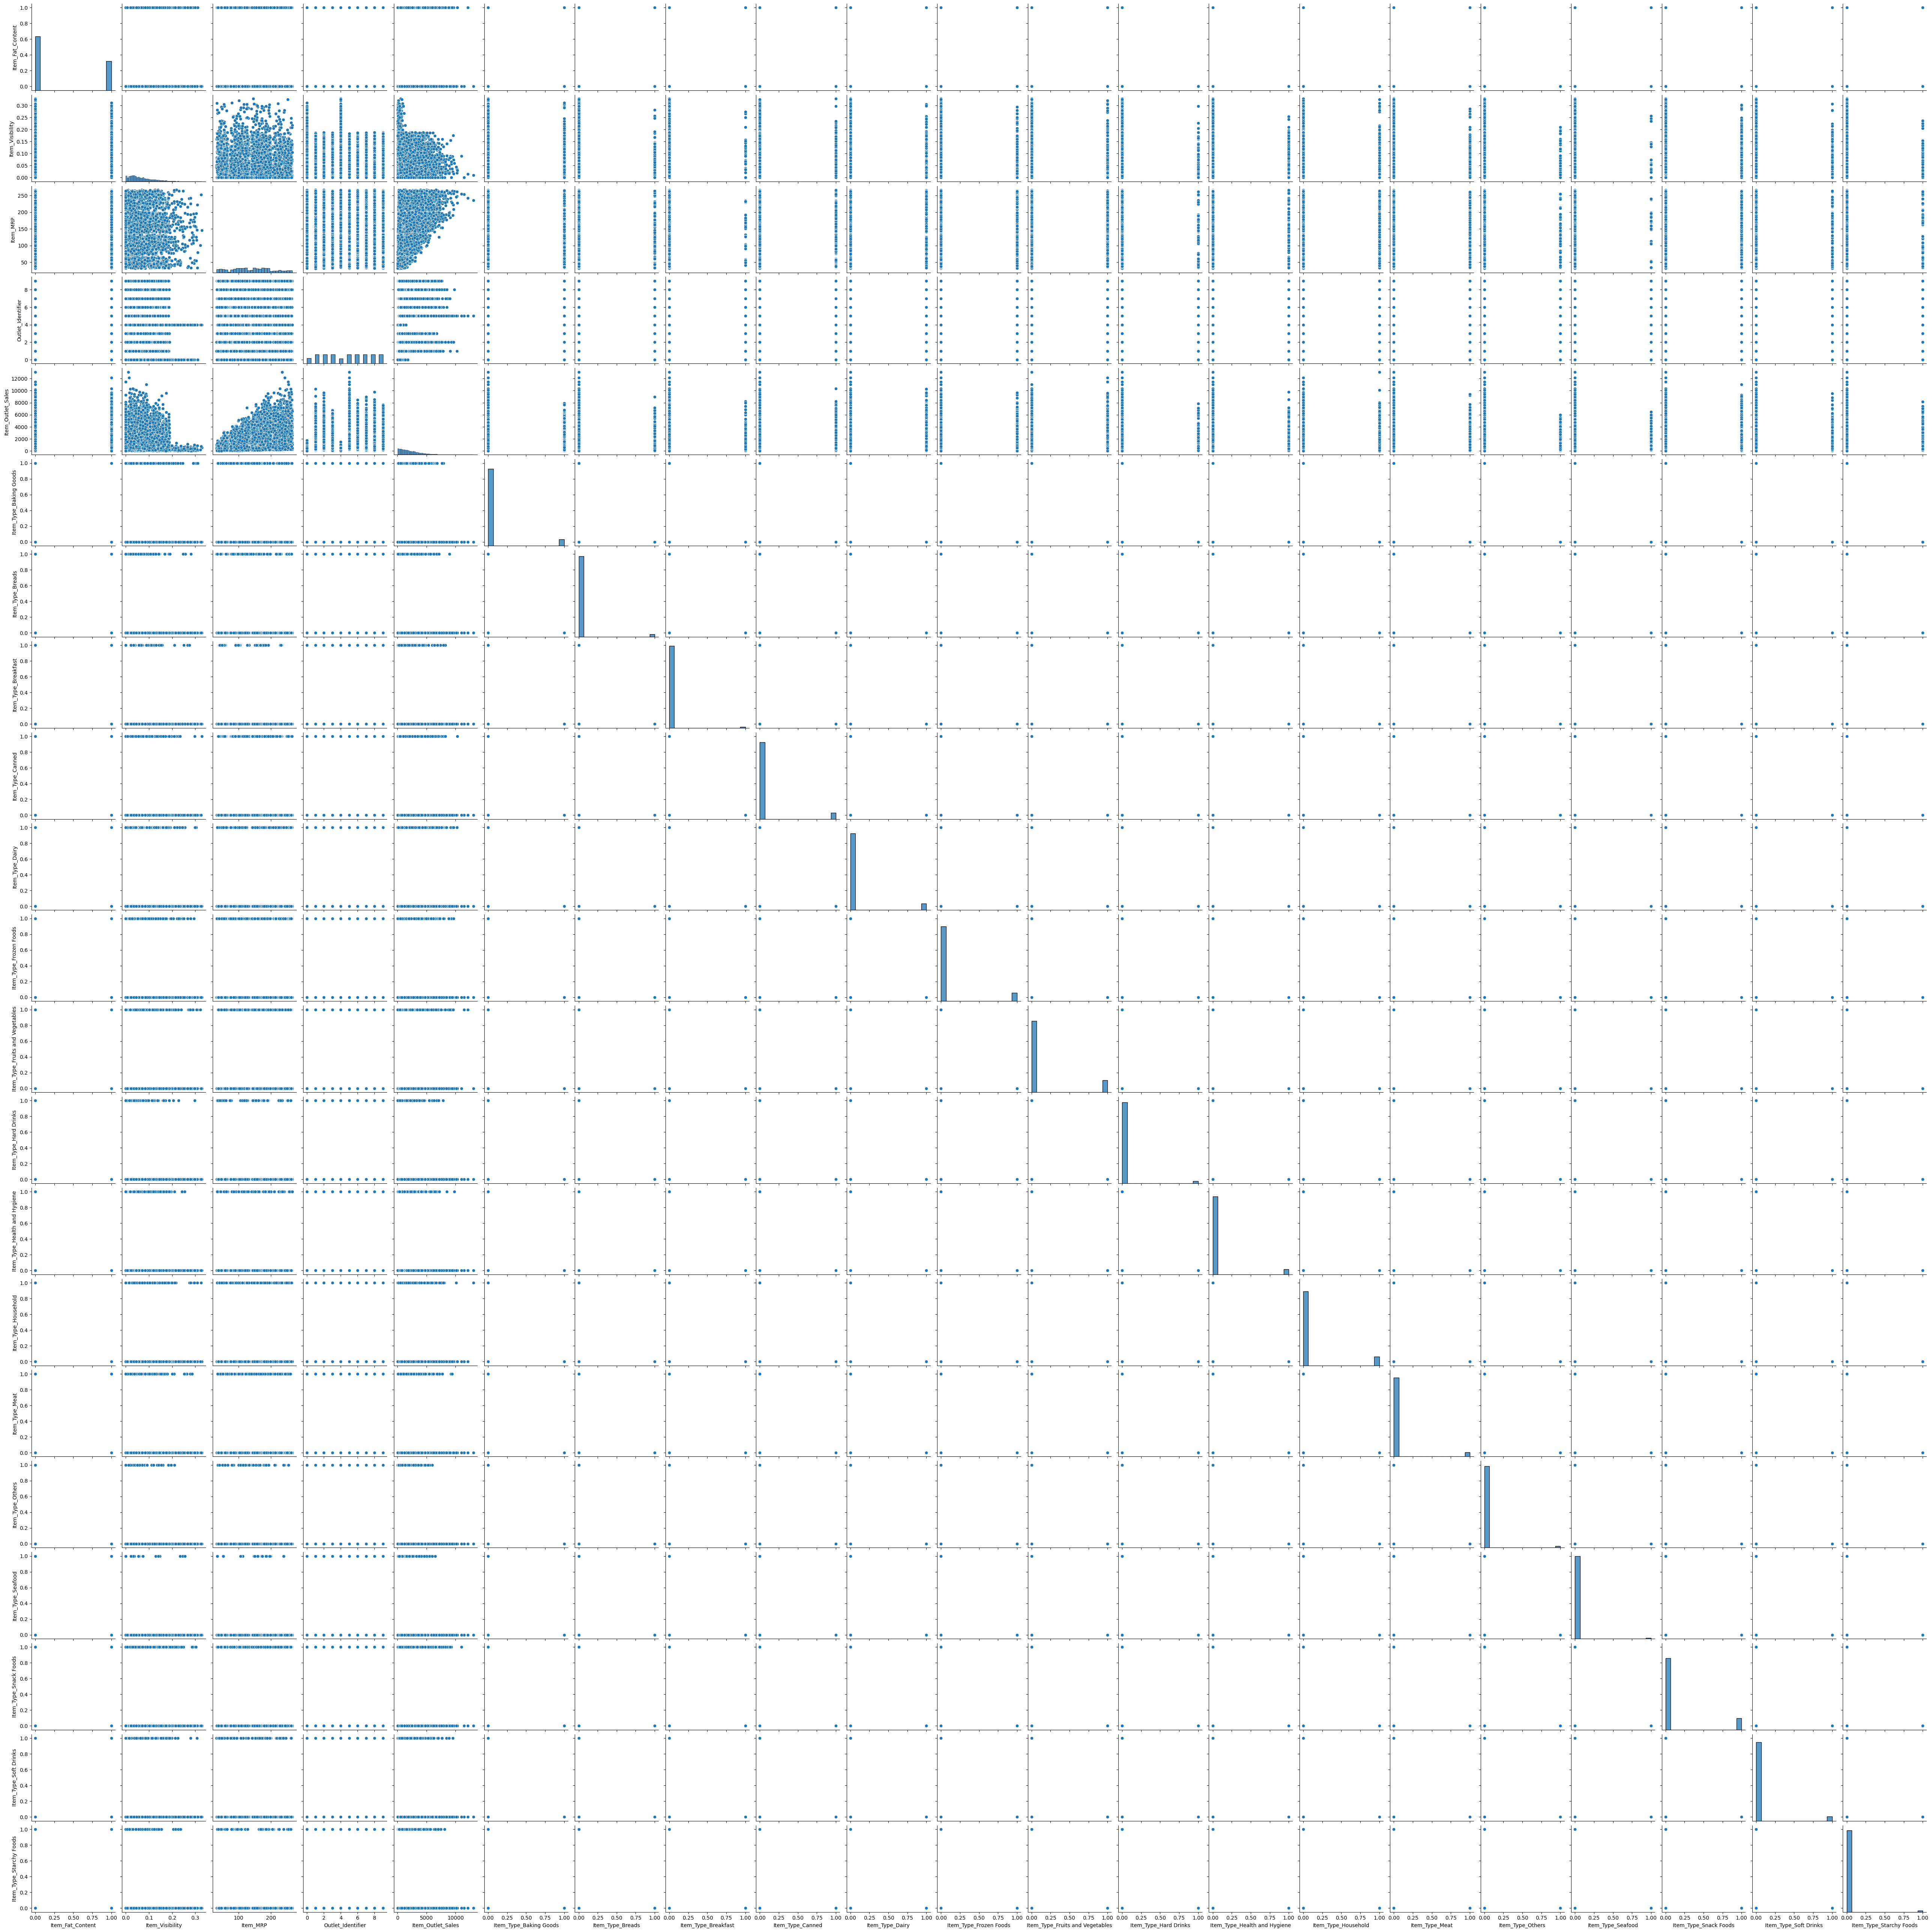

In [27]:
sns.pairplot(train_data)

# separating training and test data

In [28]:
x=train_data.loc[:,(train_data.columns!="Item_Outlet_Sales")]
x = x.apply(pd.to_numeric, errors='coerce')
x = x.replace([np.inf, -np.inf], np.nan)
x = x.fillna(x.mean())
y=train_data[['Item_Outlet_Sales']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
lr=LinearRegression()
tr=DecisionTreeRegressor()
fr=RandomForestRegressor()
gb = GradientBoostingRegressor()

# Model building

In [29]:
lr.fit(x_train,y_train)
lr_p=lr.predict(x_test)
lr_mse=mean_squared_error(y_test,lr_p)
lr_mse
print(r2_score(y_test, lr_p))

0.3395082135168622


In [30]:
tr.fit(x_train,y_train)
tr_p=tr.predict(x_test)
tr_mse=mean_squared_error(y_test,tr_p)
tr_mse
print(r2_score(y_test, tr_p))

0.197390009377734


In [31]:
fr.fit(x_train,y_train)
fr_p=fr.predict(x_test)
fr_mse=mean_squared_error(y_test,fr_p)
fr_mse
print(r2_score(y_test, fr_p))

C:\Users\Admin\AppData\Local\Temp\ipykernel_9276\1681992575.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fr.fit(x_train,y_train)


0.5440489257924717


In [32]:
gb.fit(x_train,y_train)
gb_p=gb.predict(x_test)
gb_mse=mean_squared_error(y_test,gb_p)
print("gb-mse",gb_mse)
print("gb-r2",r2_score(y_test,gb_p))


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


gb-mse 1311047.2128922532
gb-r2 0.5705154332327211


In [33]:
gb.fit(x_train,y_train)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
# Define your GradientBoostingRegressor
regressor = GradientBoostingRegressor()
# Define the hyperparameters and their values to search
param_grid = {
    'n_estimators': [50, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.005],  # Learning rate
    'max_depth': [3, 4, 5],  # Maximum depth of the individual regression estimators
}
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(x, y)  # X is your feature matrix, y is the target variable
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
# Print the best hyperparameters
print("Best Hyperparameters:", best_params)
# Train the model with the best hyperparameters
best_model.fit(x, y)
gb_p=best_model.predict(x_test)
gb_mse=mean_squared_error(y_test,gb_p)
print("gb-mse",gb_mse)
print("gb-r2",r2_score(y_test,gb_p))


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


gb-mse 1230883.6045433294
gb-r2 0.5967761447186842


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['features']=x.columns
print(vif)

         vif                         features
0   1.014105                      Item_Weight
1   1.216225                 Item_Fat_Content
2   1.019598                  Item_Visibility
3   1.013008                         Item_MRP
4   1.011107                Outlet_Identifier
5   2.458762           Item_Type_Baking Goods
6   1.556168                 Item_Type_Breads
7   1.290124              Item_Type_Breakfast
8   2.532047                 Item_Type_Canned
9   2.748875                  Item_Type_Dairy
10  3.052995           Item_Type_Frozen Foods
11  4.116640  Item_Type_Fruits and Vegetables
12  1.439886            Item_Type_Hard Drinks
13  2.115231     Item_Type_Health and Hygiene
14  3.175732              Item_Type_Household
15  2.043084                   Item_Type_Meat
16  1.394021                 Item_Type_Others
17  1.157281                Item_Type_Seafood
18  3.964375            Item_Type_Snack Foods
19  1.916484            Item_Type_Soft Drinks
20  1.384023          Item_Type_St

as there is no multicollinearity in dependent variables hence we would not be preferring to implement lasso or ridge regression 

In [35]:
svr = SVR()

# Fit the model on the training data
svr.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svr.predict(x_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print(r2_score(y_test,y_pred))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 2539641.546423973
0.1680415178154817


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
#fr.fit(x_train,y_train)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
# Create a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=8, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
# Train the Random Forest Regressor with the best hyperparameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(x_train, y_train)
# Make predictions on the test set
y_pred = best_rf.predict(x_test)
fr_p=best_rf.predict(x_test)
fr_mse=mean_squared_error(y_test,fr_p)
fr_mse
print(r2_score(y_test, fr_p))

In [ ]:
y_test.info()

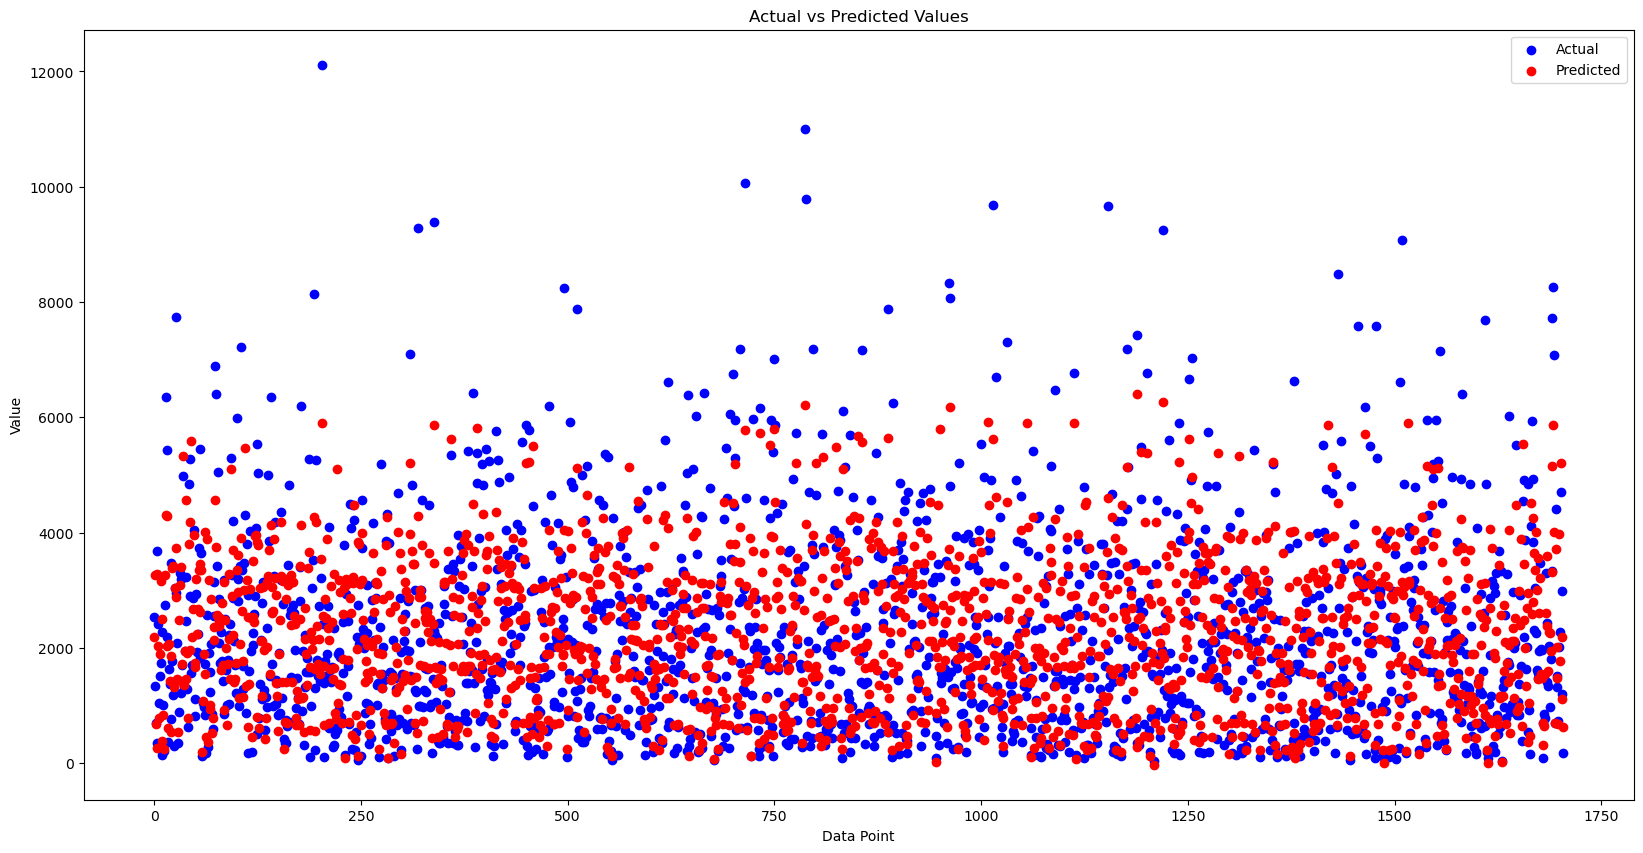

In [36]:
plt.figure(figsize=(20, 10))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
# Plotting the predicted values (gb_p)
plt.scatter(range(len(gb_p)), gb_p, color='red', label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# uploading data

In [37]:
print(test_data.dtypes)

Item_Weight                         object
Item_Fat_Content                     int64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Identifier                    int32
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_Starchy Foods              uint8
dtype: object


In [38]:
test_data['Item_Weight']=pd.to_numeric(test_data['Item_Weight'],errors='coerce').fillna(test_data['Item_Weight'].mean)

In [39]:
test_data['Item_Weight'] = pd.to_numeric(test_data['Item_Weight'], errors='coerce')
test_data['Item_Weight'] = test_data['Item_Weight'].astype(float)
x=test_data
x = x.apply(pd.to_numeric, errors='coerce')
x = x.replace([np.inf, -np.inf], np.nan)
x = x.fillna(x.mean())


In [40]:
gb_p = best_model.predict(x)
# Create a new column 'Item_Outlet_Sales' in 'test_data' DataFrame
x['Item_Outlet_Sales'] = gb_p

# Print the updated 'test_data' DataFram
print(x)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
0       20.750000                 0         0.007565  107.8622   
1        8.300000                 1         0.038428   87.3198   
2       14.600000                 0         0.099575  241.7538   
3        7.315000                 0         0.015388  155.0340   
4       12.695633                 1         0.118599  234.2300   
...           ...               ...              ...       ...   
5676    10.500000                 1         0.013496  141.3154   
5677     7.600000                 1         0.142991  169.1448   
5678    10.000000                 0         0.073529  118.7440   
5679    15.300000                 1         0.000000  214.6218   
5680     9.500000                 1         0.104720   79.7960   

      Outlet_Identifier  Item_Type_Baking Goods  Item_Type_Breads  \
0                     9                       0                 0   
1                     2                       0                 0   


In [41]:
x.to_excel('updated_data.xlsx', index=False)


In [44]:
data=pd.read_excel('updated_data.xlsx')
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Outlet_Sales
0,20.750000,0,0.007565,107.8622,9,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1600.390026
1,8.300000,1,0.038428,87.3198,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1339.785155
2,14.600000,0,0.099575,241.7538,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,603.275707
3,7.315000,0,0.015388,155.0340,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2419.888081
4,12.695633,1,0.118599,234.2300,5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5762.564222
